# Personal Transaction Analysis

## Union Bank Account

In [1]:
# load the required Libraries
# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
# Initilise the drive for dataset
from google.colab import drive

# initilise tyhe path
drive.mount('/content/drive')

# Setting Address
import os
os.chdir('/content/drive/My Drive/bank statement ')

Mounted at /content/drive


In [3]:
# Load the data (Union bank Statement)
# This data is from 1st April 2022 to 31st March 2023
# Load the data
df_UNION = pd.read_excel("Union bank Statement.xlsx")
df_UNION.head()

,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance,Month,Year
0,2023-03-31,UPIAR/309020359031/DR/ Paytm 2/NA\n/paytmqr281...,305.0,0.0,4184.56,3,2023
1,2023-03-28,UPIAR/308710080093/DR/PRAFUL V/NA\n/7020749887...,2000.0,0.0,4489.56,3,2023
2,2023-03-27,UPIAR/308612661479/DR/PRAFUL V/NA\n/7020749887...,1000.0,0.0,6489.56,3,2023
3,2023-03-27,UPIAR/308612634727/DR/PRAFUL V/NA\n/7020749887...,40.0,0.0,7489.56,3,2023
4,2023-03-25,UPIAR/308417393206/DR/PRAFUL V/NA\n/7020749887...,1000.0,0.0,7529.56,3,2023


In [4]:
# Convert 'Date' column to datetime data type
df_UNION['Date'] = pd.to_datetime(df_UNION['Date'])

# Handling missing values (if any)
df_UNION.fillna(0, inplace=True)  # Replace NaN with 0 for Withdrawal and Deposit Amounts

# Drop unnecessary columns (if needed)
df_UNION.drop(['Month', 'Year'], axis=1, inplace=True)


In [6]:
df_UNION.head()

,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance
0,2023-03-31,UPIAR/309020359031/DR/ Paytm 2/NA\n/paytmqr281...,305.0,0.0,4184.56
1,2023-03-28,UPIAR/308710080093/DR/PRAFUL V/NA\n/7020749887...,2000.0,0.0,4489.56
2,2023-03-27,UPIAR/308612661479/DR/PRAFUL V/NA\n/7020749887...,1000.0,0.0,6489.56
3,2023-03-27,UPIAR/308612634727/DR/PRAFUL V/NA\n/7020749887...,40.0,0.0,7489.56
4,2023-03-25,UPIAR/308417393206/DR/PRAFUL V/NA\n/7020749887...,1000.0,0.0,7529.56


In [7]:
# Total income and total expenses
total_income = df_UNION['Deposit Amt.'].sum()
total_expenses = df_UNION['Withdrawal Amt.'].sum()

# Print those
print("total_income: ",total_income)

print("total_expenses: ",total_expenses )

total_income:  254178.9
total_expenses:  250016.10000000003


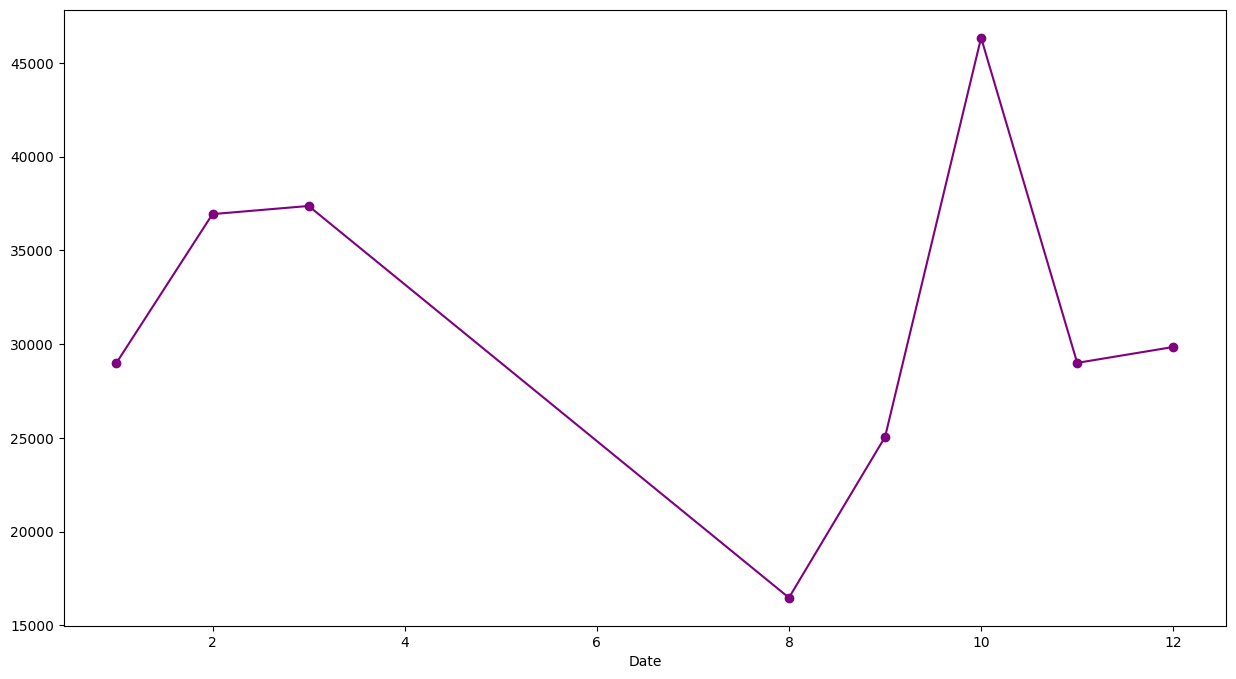

In [9]:
# Monthly spending patterns
monthly_expenses = df_UNION.groupby(df_UNION['Date'].dt.month)['Withdrawal Amt.'].sum()
monthly_expenses.plot(color = "purple",marker='o')
plt.show()

In [10]:
# Major expenses
top_expenses = df_UNION.nlargest(5, 'Withdrawal Amt.')
top_expenses

,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance
21,2023-02-13,UPIAR/304408119512/DR/PRAFUL V/NA\n/7020749887...,34700.0,0.0,93.26
13,2023-03-10,UPIAR/306918737741/DR/PRAFUL V/NA\n/7020749887...,29000.0,0.0,875.26
24,2023-01-11,UPIAR/301119605948/DR/PRAFUL V/NA\n/7020749887...,29000.0,0.0,29.26
29,2022-12-11,UPIAR/306918737741/DR/PRAFUL V/NA\n/7020749887...,29000.0,0.0,53.96
32,2022-11-11,UPIAR/231519090757/DR/PRAFUL V/NA\n/7020749887...,29000.0,0.0,853.96


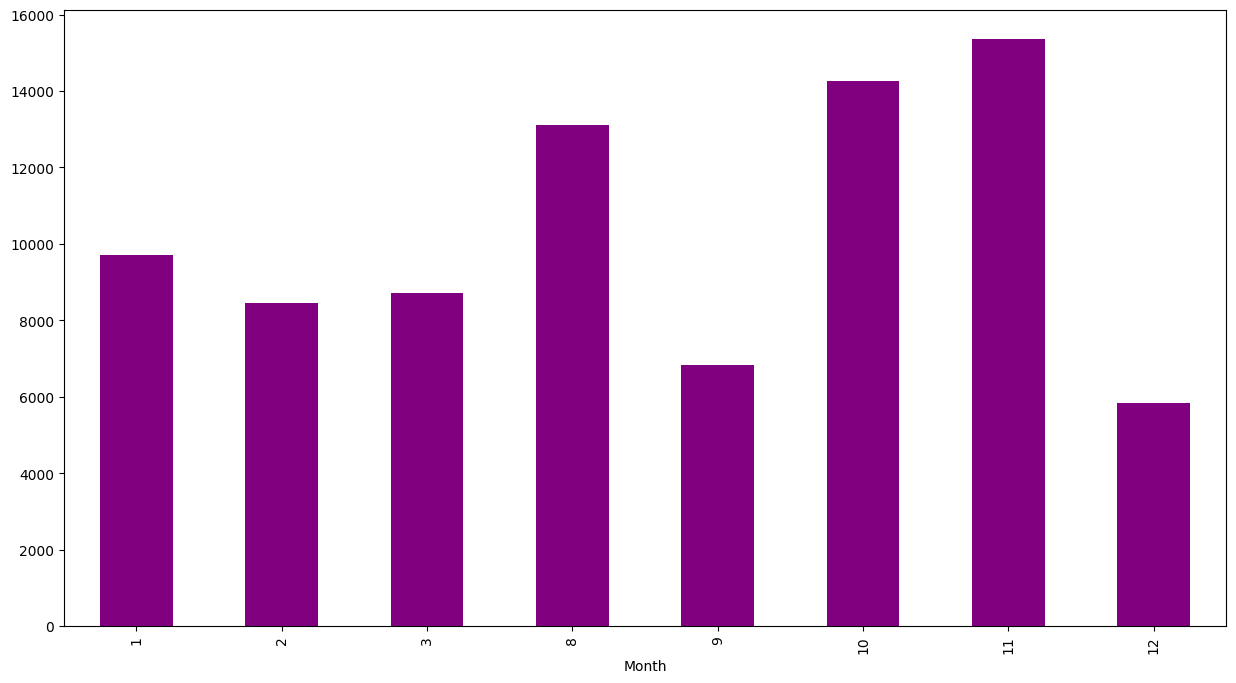

In [11]:
# Average Monthly Balance:
# Calculate the average monthly balance based on the closing balance for each month.
df_UNION['Month'] = df_UNION['Date'].dt.month
average_monthly_balance = df_UNION.groupby('Month')['Closing Balance'].mean()
average_monthly_balance.plot(kind = "bar",color = "purple")
plt.show()

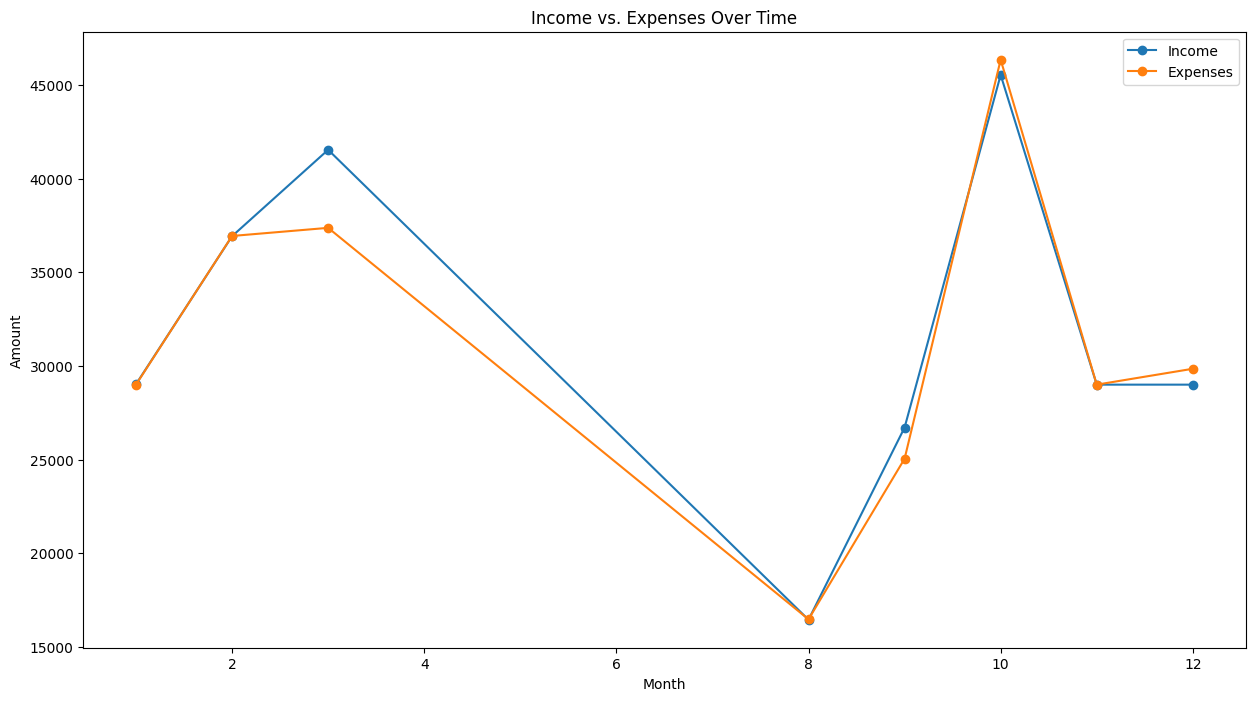

In [12]:
# Income vs. Expenses Over Time:
# Visualize the trend of your income and expenses over the months.
monthly_income = df_UNION.groupby('Month')['Deposit Amt.'].sum()
monthly_expenses = df_UNION.groupby('Month')['Withdrawal Amt.'].sum()


plt.plot(monthly_income.index, monthly_income, label='Income', marker='o')
plt.plot(monthly_expenses.index, monthly_expenses, label='Expenses', marker='o')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Income vs. Expenses Over Time')
plt.legend()
plt.show()

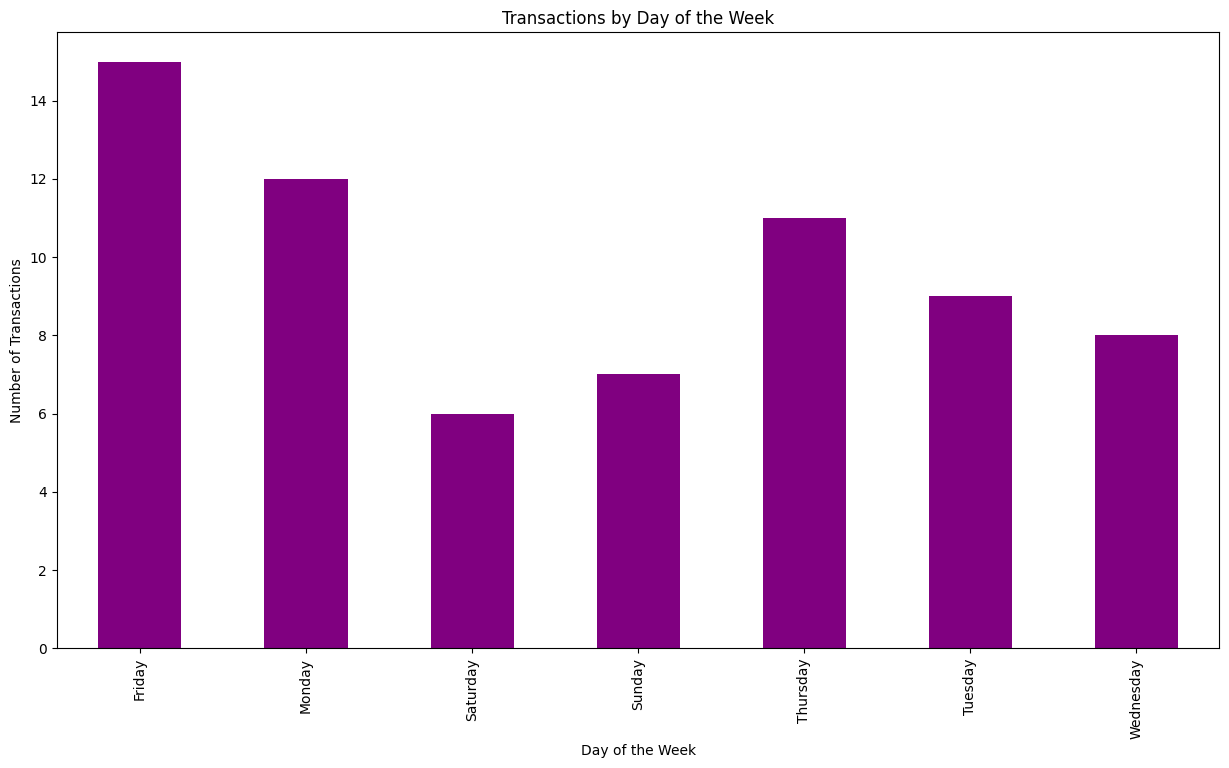

In [13]:
# Day of the Week Analysis:
# Check if there's any pattern in your transactions based on the day of the week.
df_UNION['Day_of_Week'] = df_UNION['Date'].dt.day_name()
transactions_by_day = df_UNION.groupby('Day_of_Week').size()


transactions_by_day.plot(kind='bar',color = "purple")
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Day of the Week')
plt.show()


In [14]:
# Top Income Sources:
# If the 'Narration' column contains details about income sources, you can identify the top sources.
top_income_sources = df_UNION.nlargest(5, 'Deposit Amt.')
top_income_sources

,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance,Month,Day_of_Week
23,2023-02-10,NEFT:D M NET TECHNOLOGIES AMCB230210004088,0.0,35000.0,35029.26,2,Friday
14,2023-03-10,NEFT:D M NET TECHNOLOGIES AMCB230310002991,0.0,29857.0,29875.26,3,Friday
25,2023-01-11,NEFT:D M NET TECHNOLOGIES AMCB230111002602,0.0,29000.0,29029.26,1,Wednesday
30,2022-12-11,NEFT:D M NET TECHNOLOGIES AMCB221211000583,0.0,29000.0,29053.96,12,Sunday
33,2022-11-11,NEFT:D M NET TECHNOLOGIES AMCB221111001259,0.0,29000.0,29853.96,11,Friday


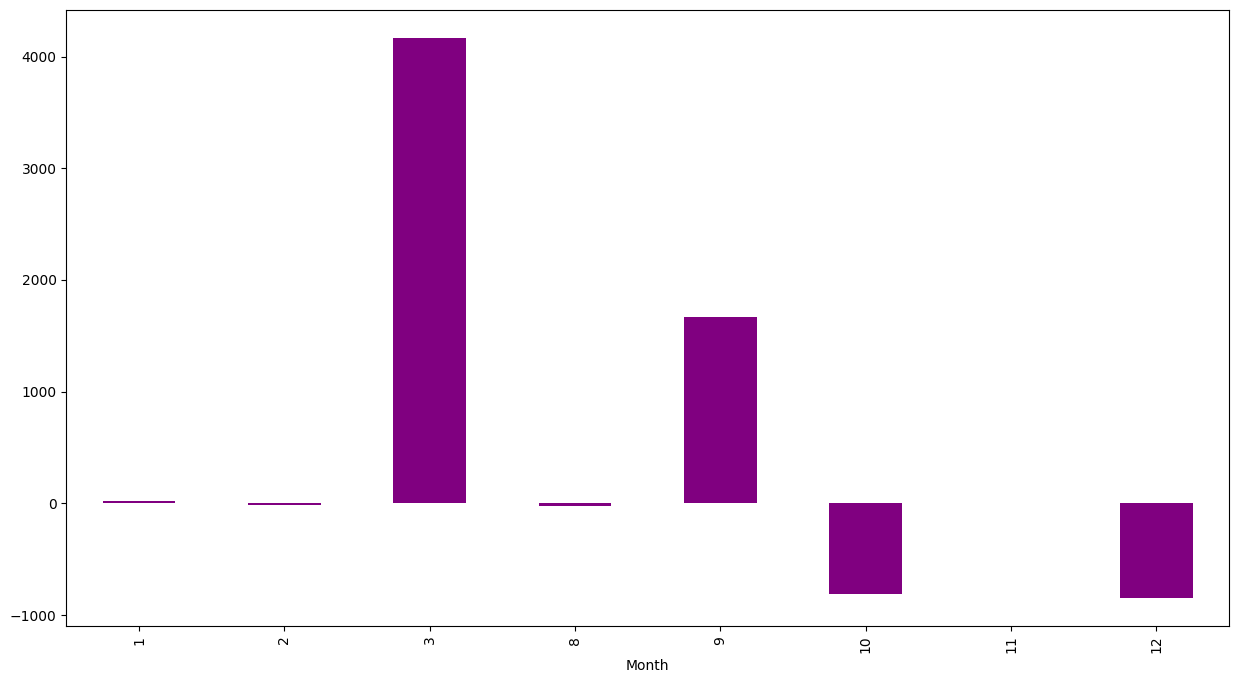

In [15]:
# Net Cash Flow:
# Calculate the net cash flow for each month (income minus expenses).
df_UNION['Net_Cash_Flow'] = df_UNION['Deposit Amt.'] - df_UNION['Withdrawal Amt.']
monthly_cash_flow = df_UNION.groupby('Month')['Net_Cash_Flow'].sum()
monthly_cash_flow.plot(kind = "bar",color = "purple")
plt.show()

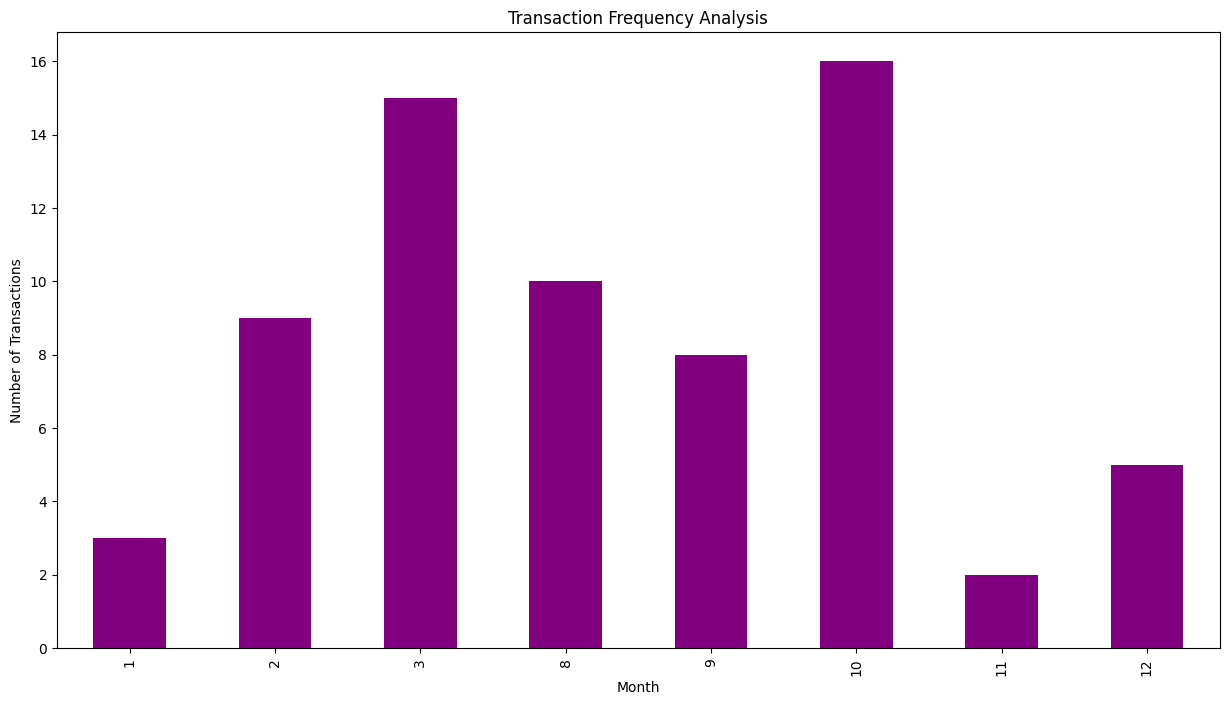

In [16]:
# Transaction Frequency Analysis:
# Analyze the frequency of transactions during the year.
transaction_frequency = df_UNION.groupby('Month').size()


transaction_frequency.plot(kind='bar',color = "purple")
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Transaction Frequency Analysis')
plt.show()


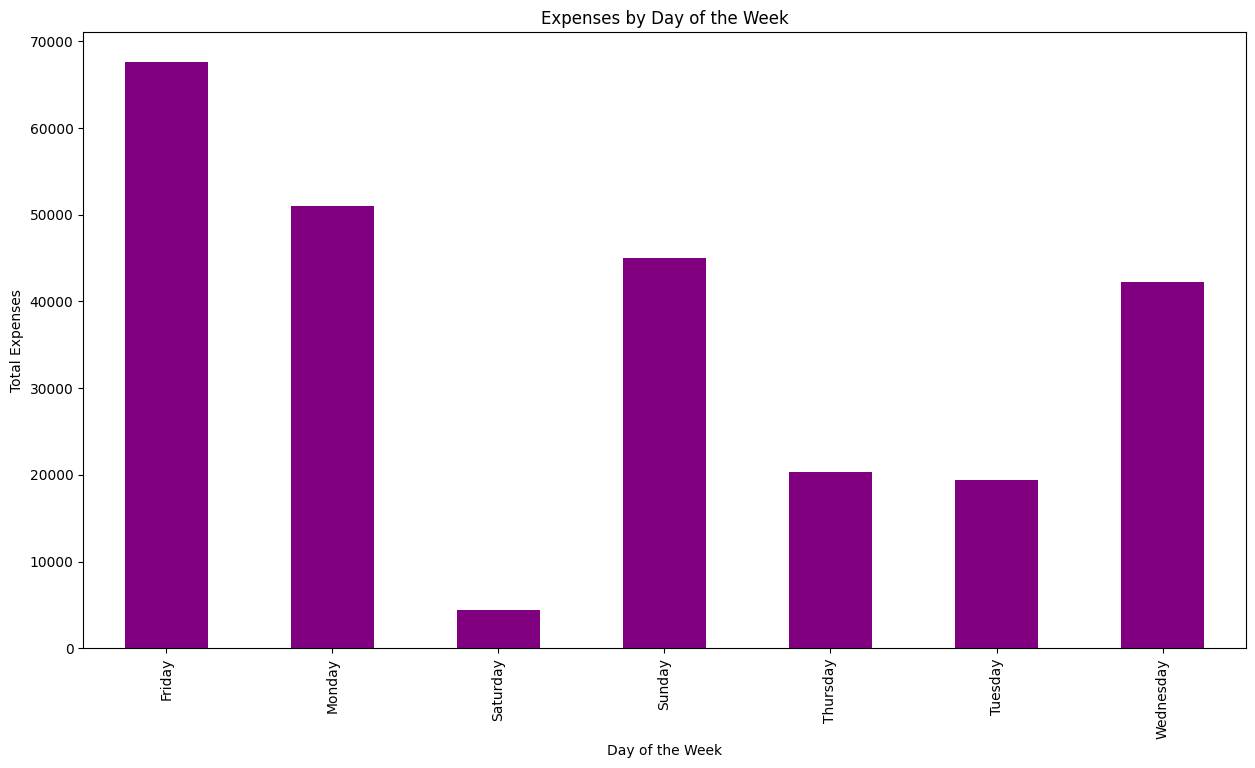

In [17]:
# Expenses by Day of the Week:
# Analyze your expenses on each day of the week to identify spending patterns.
expenses_by_day_of_week = df_UNION[df_UNION['Withdrawal Amt.'] > 0].groupby('Day_of_Week')['Withdrawal Amt.'].sum()


expenses_by_day_of_week.plot(kind='bar',color = "purple")
plt.xlabel('Day of the Week')
plt.ylabel('Total Expenses')
plt.title('Expenses by Day of the Week')
plt.show()

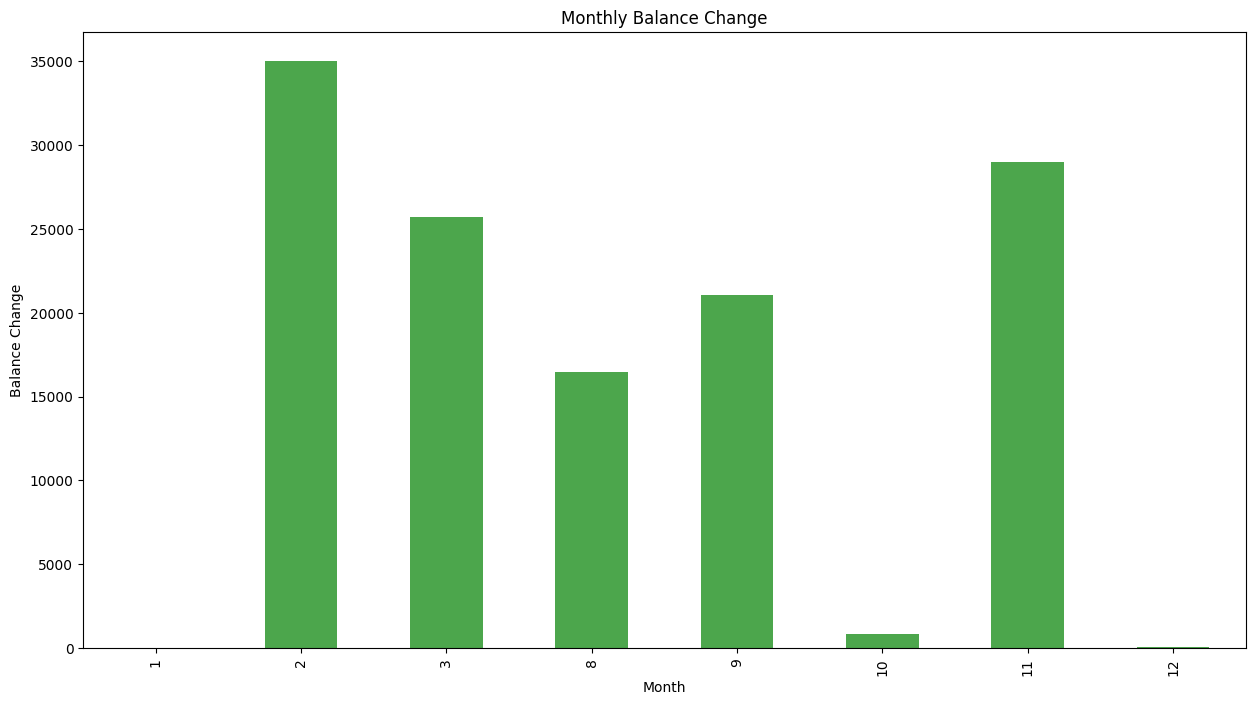

In [18]:
# Monthly Balance Change:
# Plot the change in your account balance over the months to see how it fluctuates.
monthly_balance_change = df_UNION.groupby('Month')['Closing Balance'].last() - df_UNION.groupby('Month')['Closing Balance'].first()


monthly_balance_change.plot(kind='bar', color='g', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Balance Change')
plt.title('Monthly Balance Change')
plt.show()


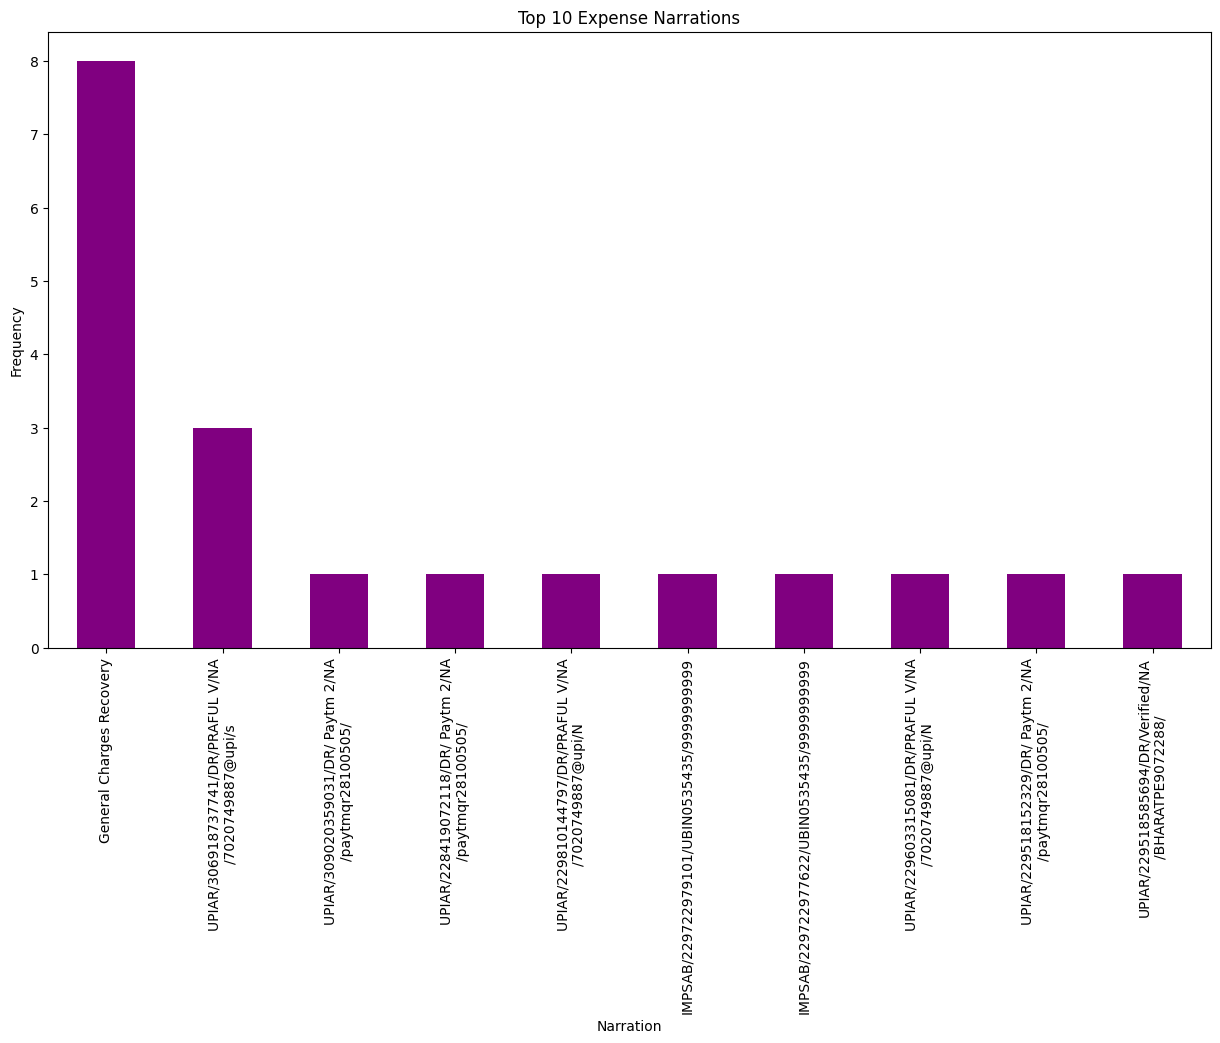

In [19]:
# Expense Distribution by Narration:
# Analyze the distribution of expenses based on the descriptions in the 'Narration' column.

top_narrations = df_UNION['Narration'].value_counts().nlargest(10)
top_narrations.plot(kind='bar',color = "purple")
plt.xlabel('Narration')
plt.ylabel('Frequency')
plt.title('Top 10 Expense Narrations')
plt.show()


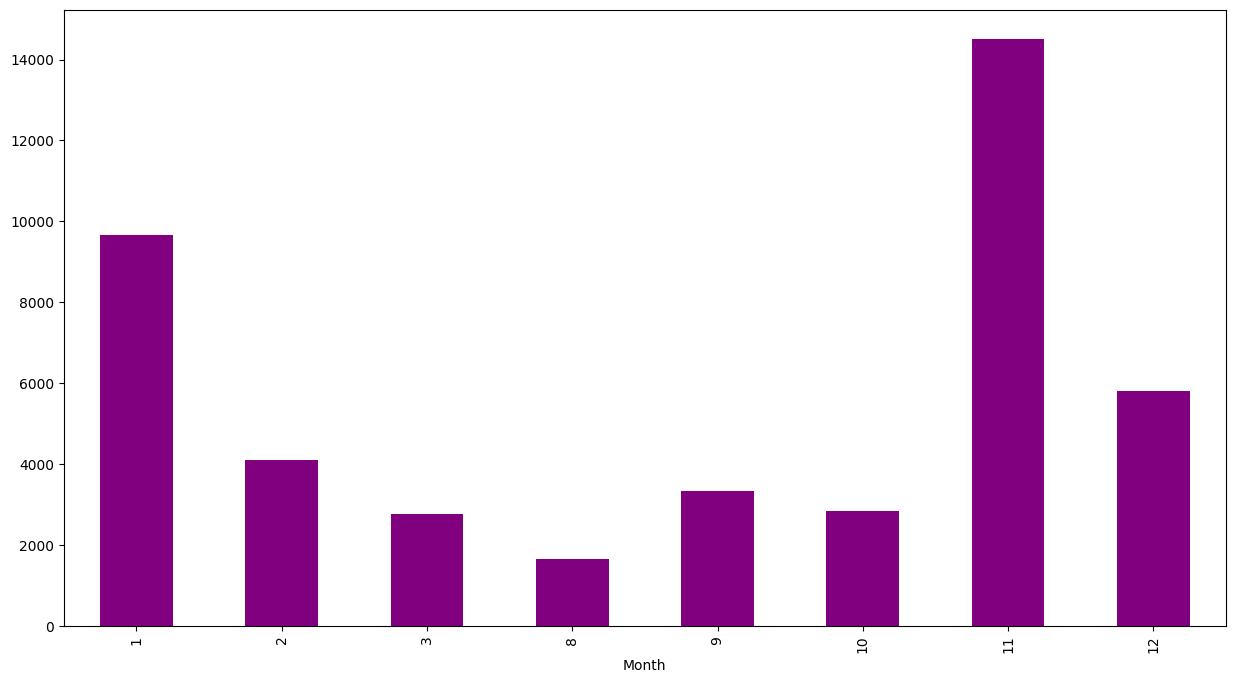

In [20]:
# Average Withdrawal and Deposit Amounts:
# Calculate the average withdrawal and deposit amounts for each month.
average_withdrawal_per_month = df_UNION.groupby('Month')['Withdrawal Amt.'].mean()
average_deposit_per_month = df_UNION.groupby('Month')['Deposit Amt.'].mean()
average_deposit_per_month.plot(kind = "bar",color = "purple")
plt.show()

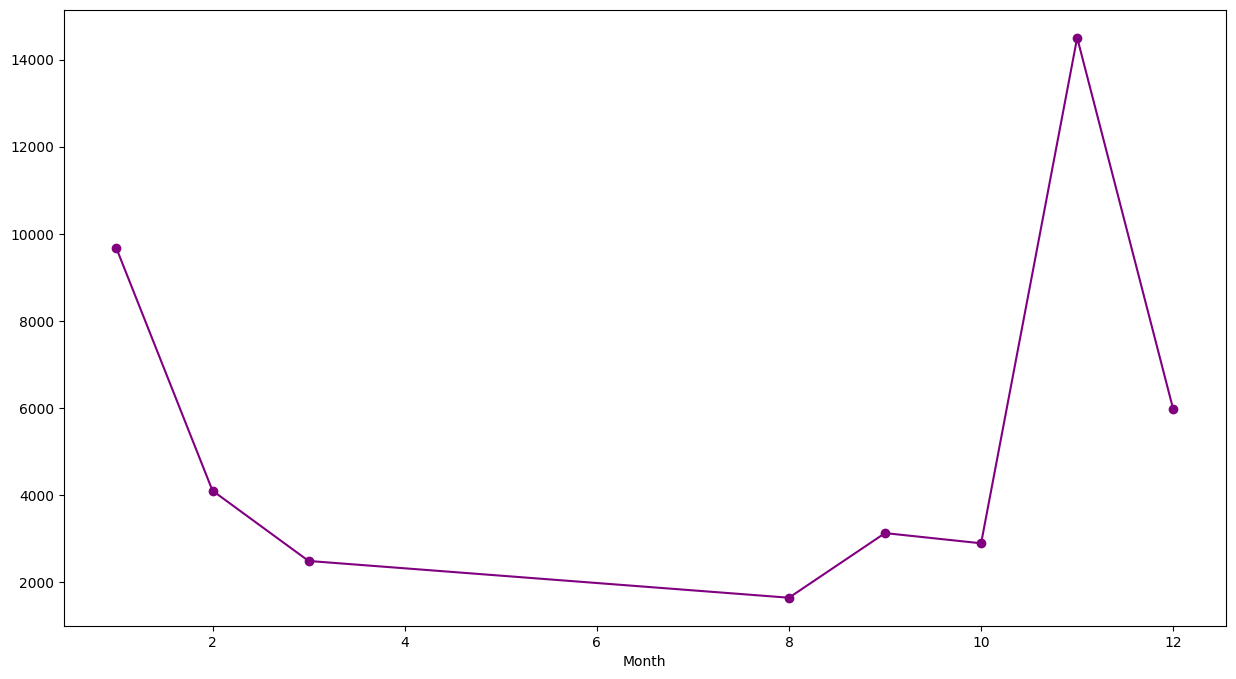

In [21]:
average_withdrawal_per_month.plot(kind = "line",color = "purple",marker='o')
plt.show()

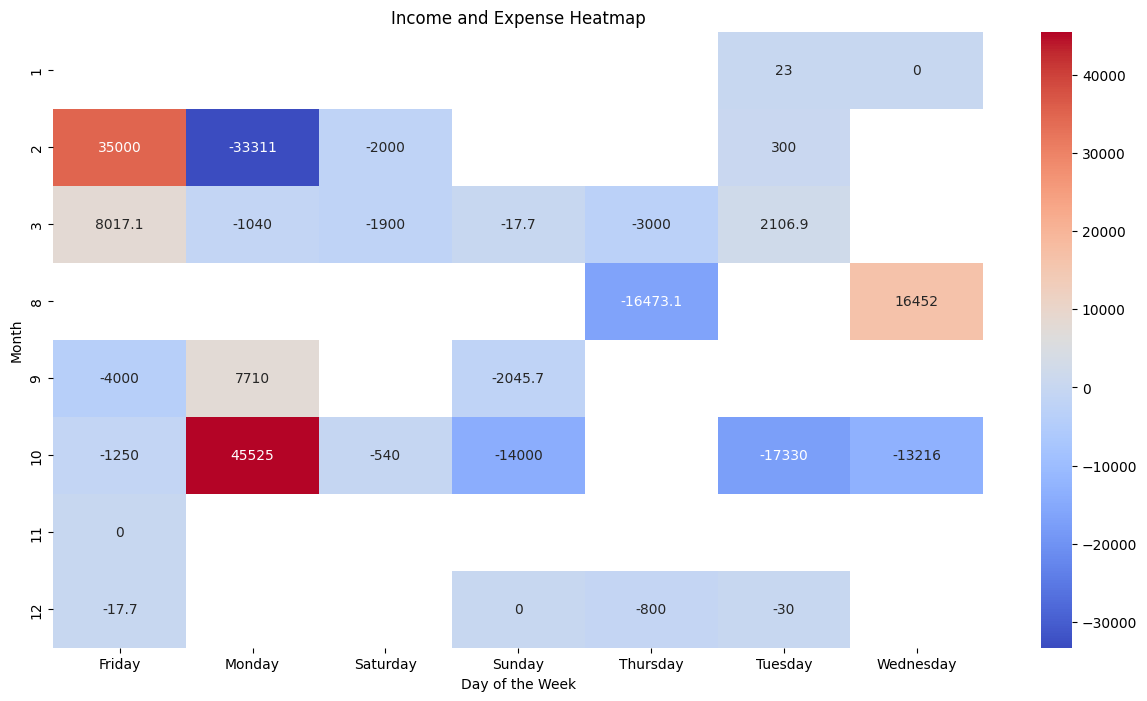

In [22]:
# Income and Expense Heatmap:
# Create a heatmap to visualize the distribution of income and expenses across different months.
income_expense_heatmap = df_UNION.pivot_table(index='Month', columns='Day_of_Week', values='Net_Cash_Flow', aggfunc='sum')


sns.heatmap(income_expense_heatmap, cmap='coolwarm', annot=True, fmt='g')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title('Income and Expense Heatmap')
plt.show()


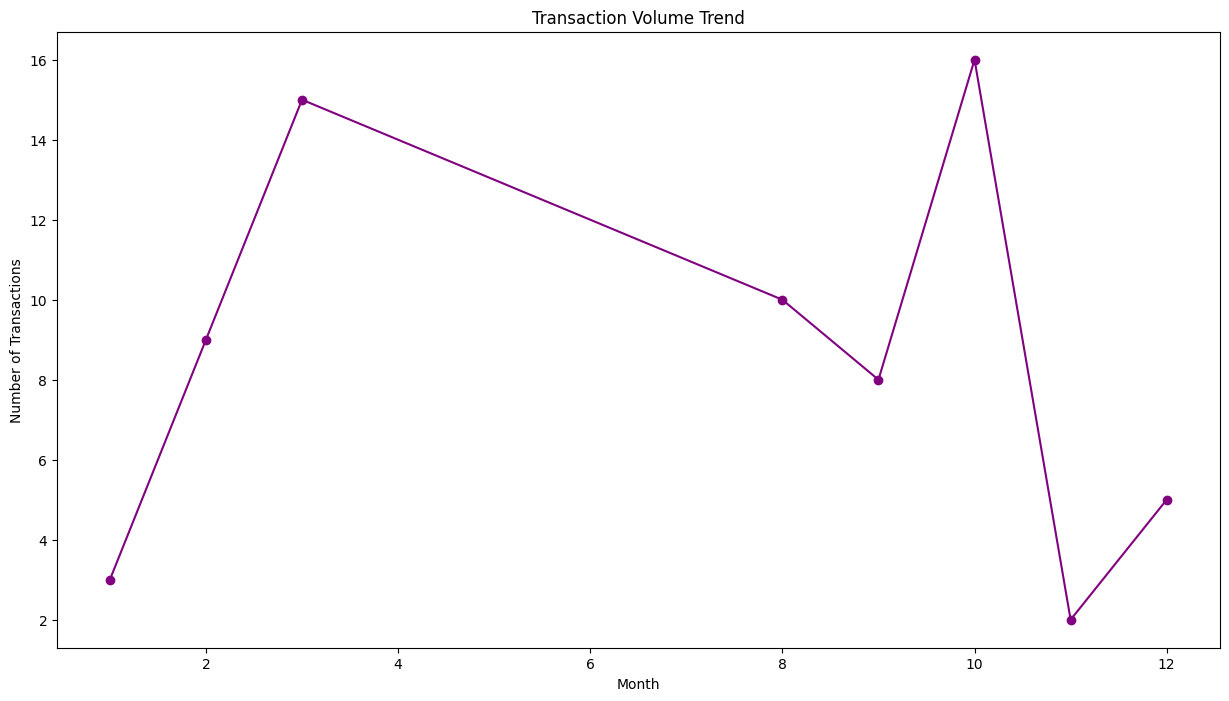

In [23]:
# Transaction Volume Trend:
# Visualize the trend of the number of transactions over the months.
monthly_transaction_count = df_UNION.groupby('Month').size()


monthly_transaction_count.plot(kind='line', marker='o',color = "purple")
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Transaction Volume Trend')
plt.show()


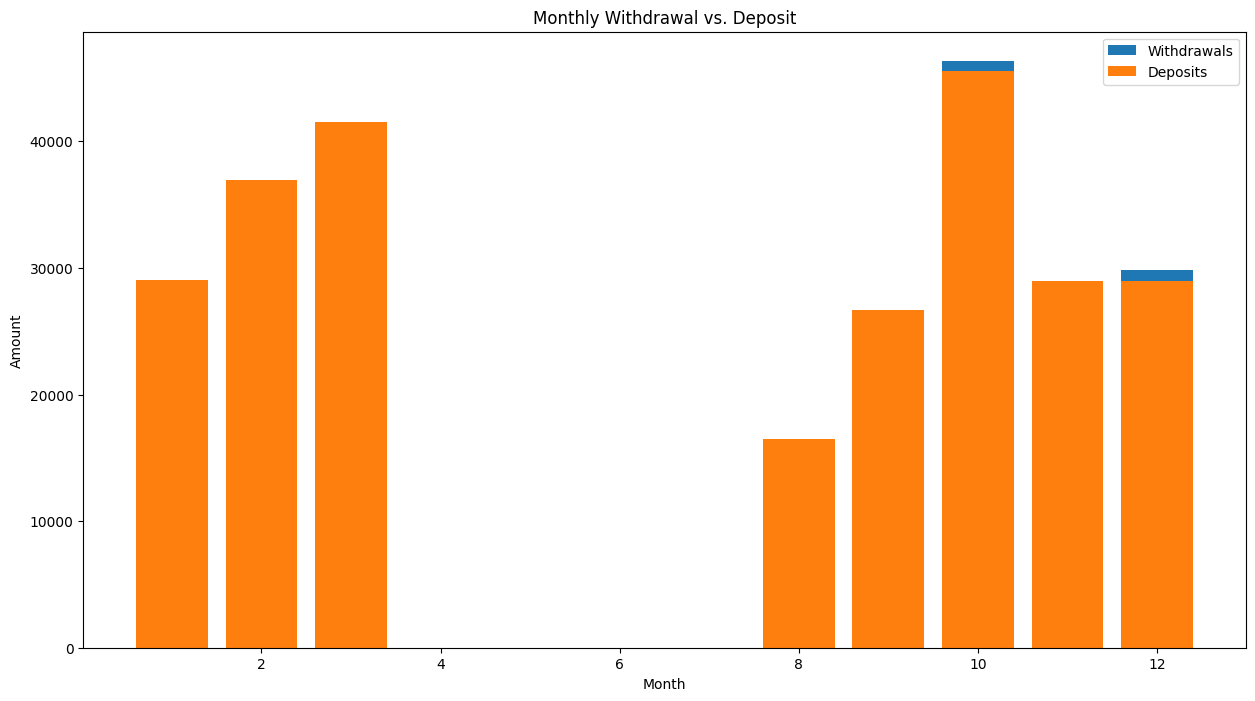

In [24]:
# Monthly Withdrawal vs. Deposit Comparison:
# Compare the monthly total withdrawal and deposit amounts.
monthly_withdrawals = df_UNION.groupby('Month')['Withdrawal Amt.'].sum()
monthly_deposits = df_UNION.groupby('Month')['Deposit Amt.'].sum()


plt.bar(monthly_withdrawals.index, monthly_withdrawals, label='Withdrawals')
plt.bar(monthly_deposits.index, monthly_deposits, label='Deposits')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Withdrawal vs. Deposit')
plt.legend()
plt.show()


In [25]:
bank_statement_df = df_UNION

average_daily_expenses:  Month
1     14500.000000
2      7387.200000
3      4152.177778
8      8236.550000
9      6261.425000
10     4634.400000
11    29000.000000
12     7461.925000
Name: Withdrawal Amt., dtype: float64


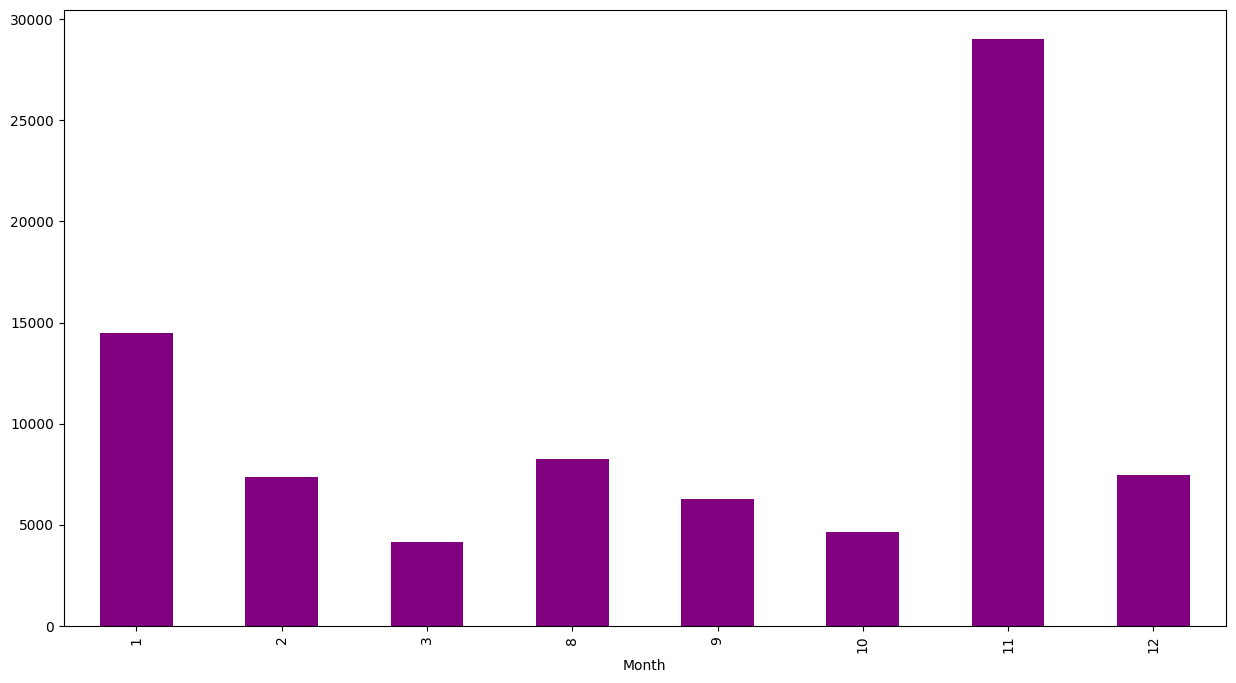

In [26]:
# Average Daily Expenses:
# Calculate the average daily expenses for each month.
bank_statement_df['Day'] = bank_statement_df['Date'].dt.day
daily_expenses = bank_statement_df.groupby(['Month', 'Day'])['Withdrawal Amt.'].sum().reset_index()
average_daily_expenses = daily_expenses.groupby('Month')['Withdrawal Amt.'].mean()
print("average_daily_expenses: ",average_daily_expenses)
average_daily_expenses.plot(kind = "bar",color = "purple")
plt.show()

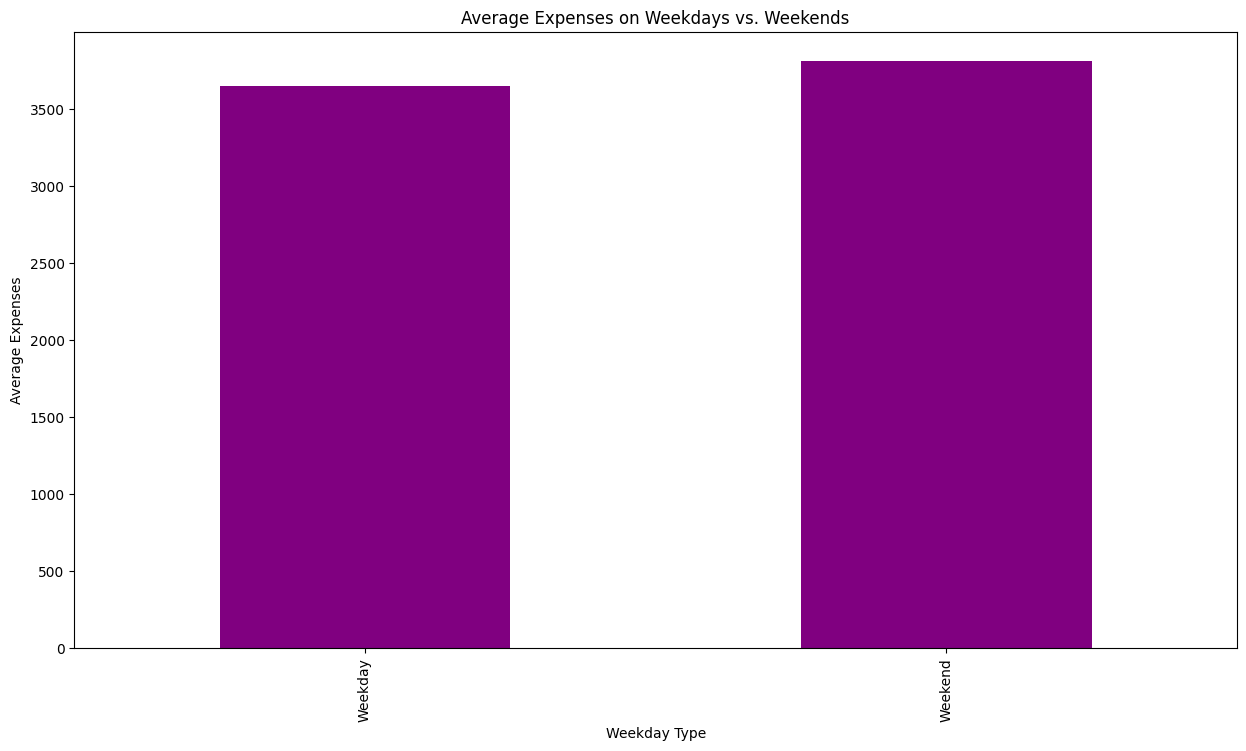

In [27]:
# Weekday vs. Weekend Expenses:
# Compare your average expenses on weekdays and weekends.
def categorize_weekday(weekday):
    if weekday in ['Saturday', 'Sunday']:
        return 'Weekend'
    return 'Weekday'

bank_statement_df['Weekday_Type'] = bank_statement_df['Day_of_Week'].apply(categorize_weekday)
expenses_by_weekday_type = bank_statement_df.groupby('Weekday_Type')['Withdrawal Amt.'].mean()


expenses_by_weekday_type.plot(kind='bar',color = "purple")
plt.xlabel('Weekday Type')
plt.ylabel('Average Expenses')
plt.title('Average Expenses on Weekdays vs. Weekends')
plt.show()


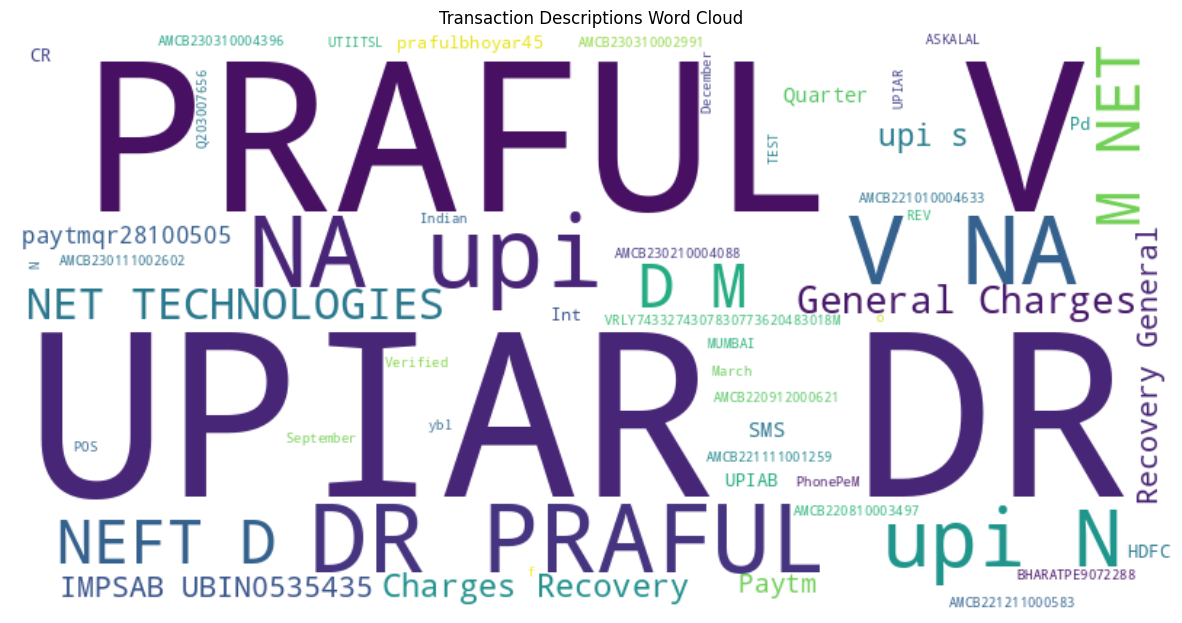

In [28]:
# Transaction Descriptions Word Cloud:
# Create a word cloud to visualize the most frequent words in transaction descriptions.
from wordcloud import WordCloud

narration_words = ' '.join(bank_statement_df['Narration'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(narration_words)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Transaction Descriptions Word Cloud')
plt.show()


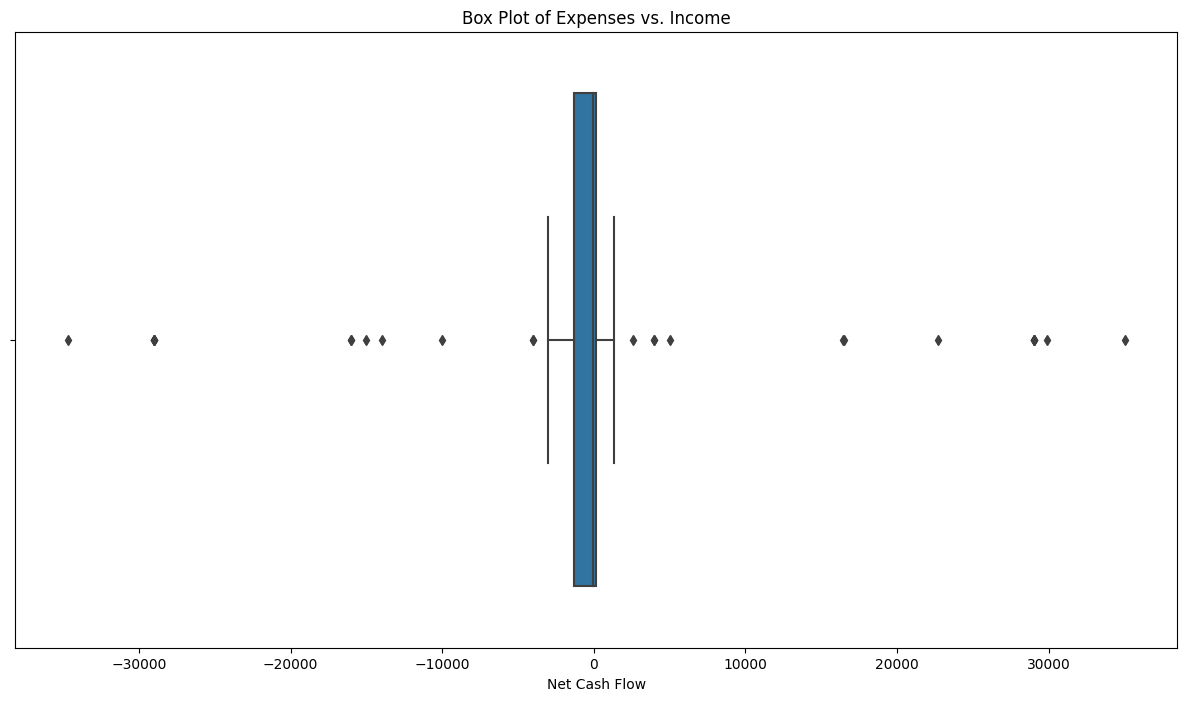

In [29]:
# Expenses vs. Income Box Plot:
# Compare the distribution of expenses and income using a box plot.

sns.boxplot(x='Net_Cash_Flow', data=bank_statement_df)
plt.xlabel('Net Cash Flow')
plt.title('Box Plot of Expenses vs. Income')
plt.show()


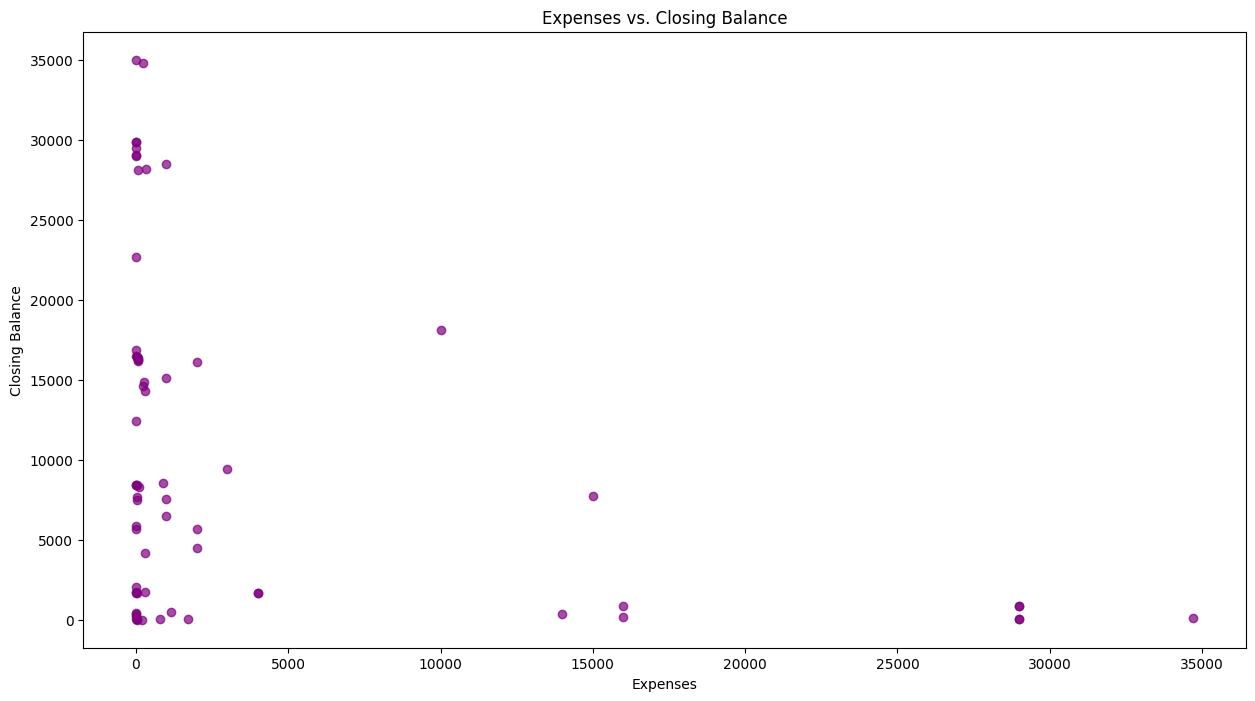

In [30]:
# Expenses vs. Closing Balance Scatter Plot:
# Visualize the relationship between expenses and the closing balance for each transaction.

plt.scatter(bank_statement_df['Withdrawal Amt.'], bank_statement_df['Closing Balance'], alpha=0.7,color = "purple")
plt.xlabel('Expenses')
plt.ylabel('Closing Balance')
plt.title('Expenses vs. Closing Balance')
plt.show()

monthly_savings:  Month
1       23.0
2      -11.0
3     4166.3
8      -21.1
9     1664.3
10    -811.0
11       0.0
12    -847.7
dtype: float64


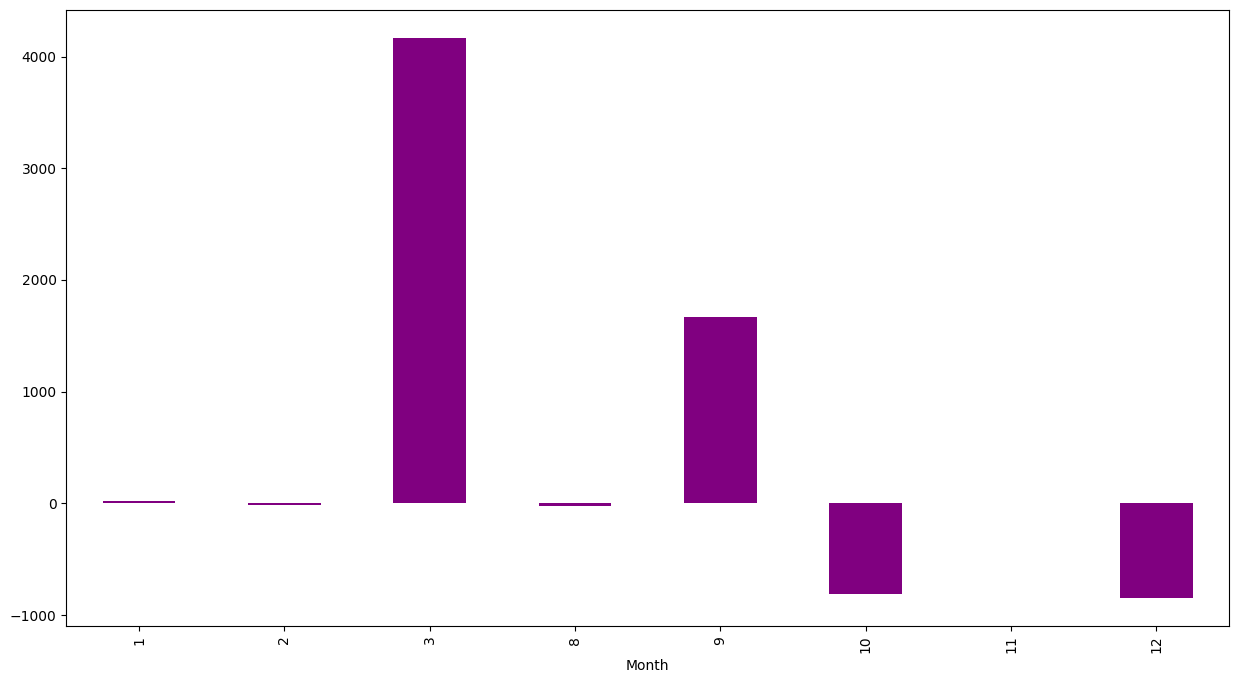

In [31]:
# Monthly Savings:
# Calculate your monthly savings by subtracting total expenses from total income.
monthly_savings = monthly_income - monthly_expenses
print("monthly_savings: ",monthly_savings)
monthly_savings.plot(kind = "bar",color = "purple")
plt.show()

In [32]:
# Biggest Income and Expense Days:
# Identify the days with the highest income and expenses.
biggest_income_day = bank_statement_df.nlargest(1, 'Deposit Amt.')
biggest_expense_day = bank_statement_df.nlargest(1, 'Withdrawal Amt.')
print("biggest_income_day: ")
biggest_income_day


biggest_income_day: 


,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance,Month,Day_of_Week,Net_Cash_Flow,Day,Weekday_Type
23,2023-02-10,NEFT:D M NET TECHNOLOGIES AMCB230210004088,0.0,35000.0,35029.26,2,Friday,35000.0,10,Weekday


In [33]:
print("biggest_expense_day: ")
biggest_expense_day

biggest_expense_day: 


,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance,Month,Day_of_Week,Net_Cash_Flow,Day,Weekday_Type
21,2023-02-13,UPIAR/304408119512/DR/PRAFUL V/NA\n/7020749887...,34700.0,0.0,93.26,2,Monday,-34700.0,13,Weekday


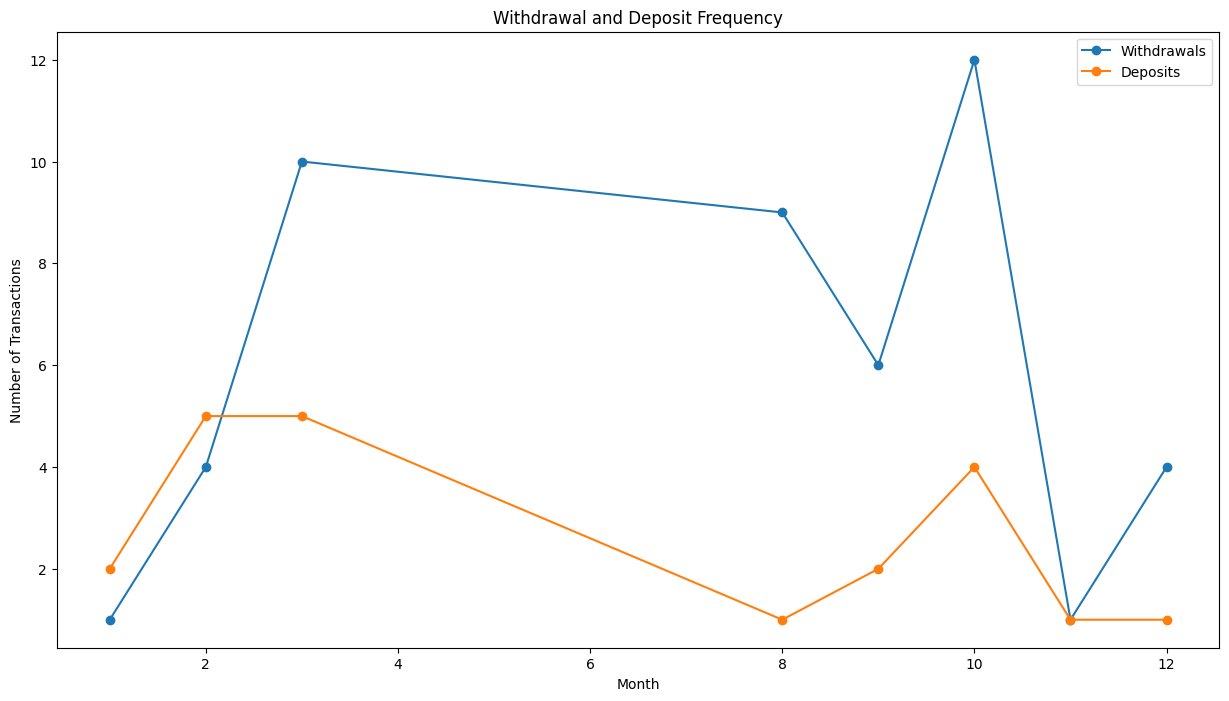

In [34]:
# Withdrawal and Deposit Frequency:
# Analyze the frequency of withdrawals and deposits over the months.
withdrawal_frequency = bank_statement_df[bank_statement_df['Withdrawal Amt.'] > 0].groupby('Month').size()
deposit_frequency = bank_statement_df[bank_statement_df['Deposit Amt.'] > 0].groupby('Month').size()


withdrawal_frequency.plot(kind='line', marker='o', label='Withdrawals')
deposit_frequency.plot(kind='line', marker='o', label='Deposits')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Withdrawal and Deposit Frequency')
plt.legend()
plt.show()


daily_average_balance:  Month
1     484.796333
2     422.501889
3     436.087667
8     655.334000
9     340.944250
10    712.682375
11    767.698000
12    292.044000
Name: Closing Balance, dtype: float64


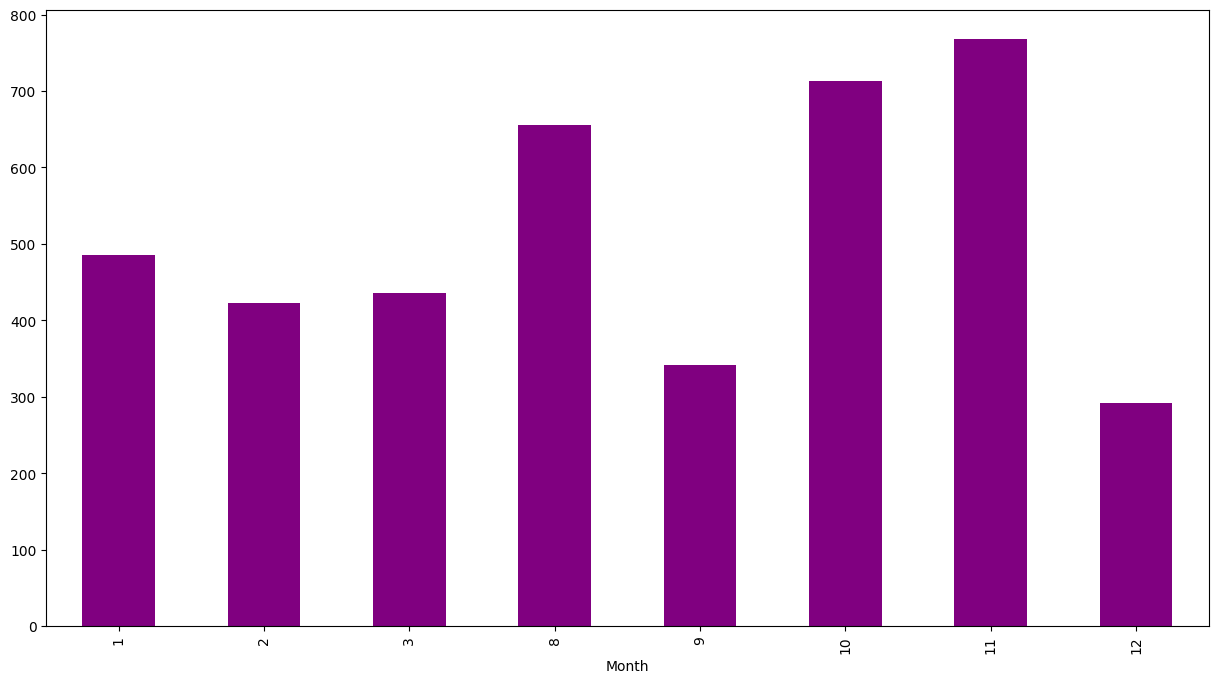

In [35]:
# Daily Average Balance:
# Calculate the daily average balance for each month.
daily_average_balance = bank_statement_df.groupby('Month')['Closing Balance'].mean() / bank_statement_df['Day'].nunique()
print("daily_average_balance: ",daily_average_balance)
daily_average_balance.plot(kind = "bar",color = "purple")
plt.show()

In [36]:
# Transaction Outliers:
# Identify any outliers in transactions that are significantly higher or lower than typical.
transaction_outliers = bank_statement_df[
    (bank_statement_df['Withdrawal Amt.'] > bank_statement_df['Withdrawal Amt.'].mean() + 3 * bank_statement_df['Withdrawal Amt.'].std()) |
    (bank_statement_df['Deposit Amt.'] > bank_statement_df['Deposit Amt.'].mean() + 3 * bank_statement_df['Deposit Amt.'].std())
]
transaction_outliers.head()

,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance,Month,Day_of_Week,Net_Cash_Flow,Day,Weekday_Type
13,2023-03-10,UPIAR/306918737741/DR/PRAFUL V/NA\n/7020749887...,29000.0,0.0,875.26,3,Friday,-29000.0,10,Weekday
21,2023-02-13,UPIAR/304408119512/DR/PRAFUL V/NA\n/7020749887...,34700.0,0.0,93.26,2,Monday,-34700.0,13,Weekday
23,2023-02-10,NEFT:D M NET TECHNOLOGIES AMCB230210004088,0.0,35000.0,35029.26,2,Friday,35000.0,10,Weekday
24,2023-01-11,UPIAR/301119605948/DR/PRAFUL V/NA\n/7020749887...,29000.0,0.0,29.26,1,Wednesday,-29000.0,11,Weekday
29,2022-12-11,UPIAR/306918737741/DR/PRAFUL V/NA\n/7020749887...,29000.0,0.0,53.96,12,Sunday,-29000.0,11,Weekend


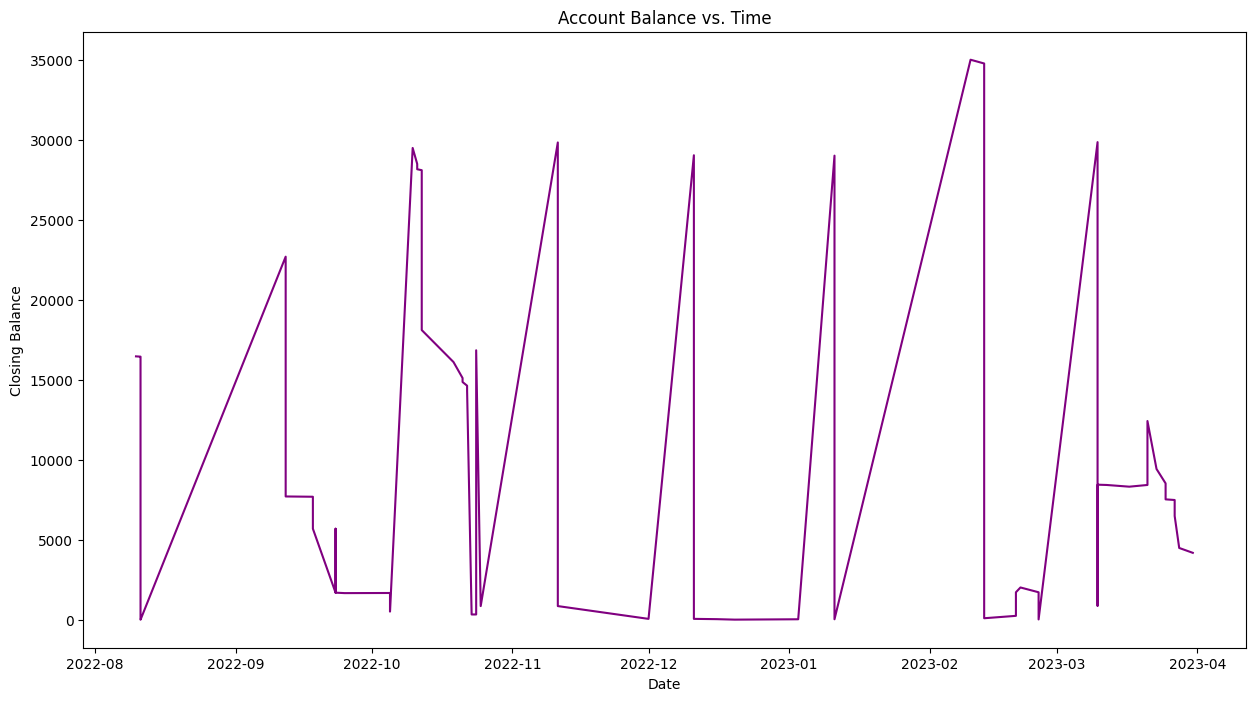

In [37]:
# Balance vs. Time Plot:
# Visualize the change in your account balance over time.

plt.plot(bank_statement_df['Date'], bank_statement_df['Closing Balance'],color = "purple")
plt.xlabel('Date')
plt.ylabel('Closing Balance')
plt.title('Account Balance vs. Time')
plt.show()


In [38]:
# Expense vs. Income Ratio:
# Calculate the ratio of total expenses to total income for each month.
expense_income_ratio = total_expenses / total_income
print("expense_income_ratio: ",expense_income_ratio)

expense_income_ratio:  0.9836225587568442


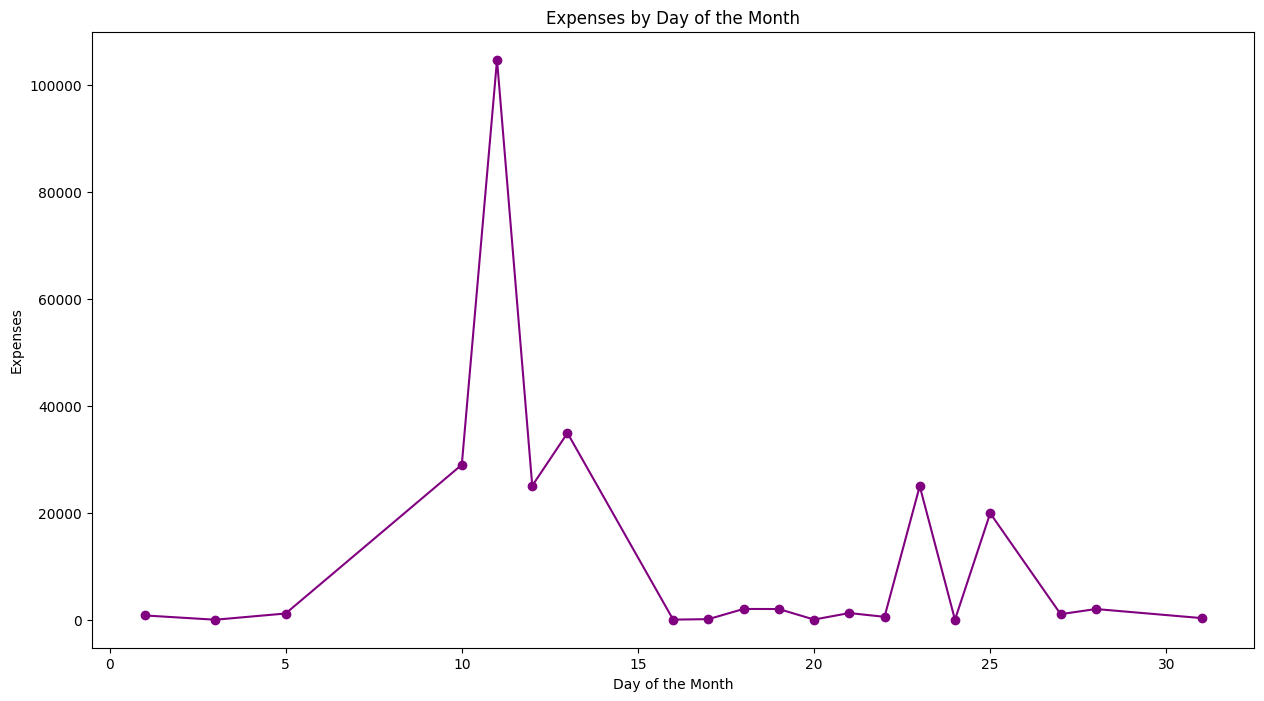

In [39]:
# Expenses by Day of the Month:
# Analyze your expenses on different days of the month.
expenses_by_day_of_month = bank_statement_df.groupby(bank_statement_df['Date'].dt.day)['Withdrawal Amt.'].sum()


plt.plot(expenses_by_day_of_month.index, expenses_by_day_of_month, marker='o',color = "purple")
plt.xlabel('Day of the Month')
plt.ylabel('Expenses')
plt.title('Expenses by Day of the Month')
plt.show()


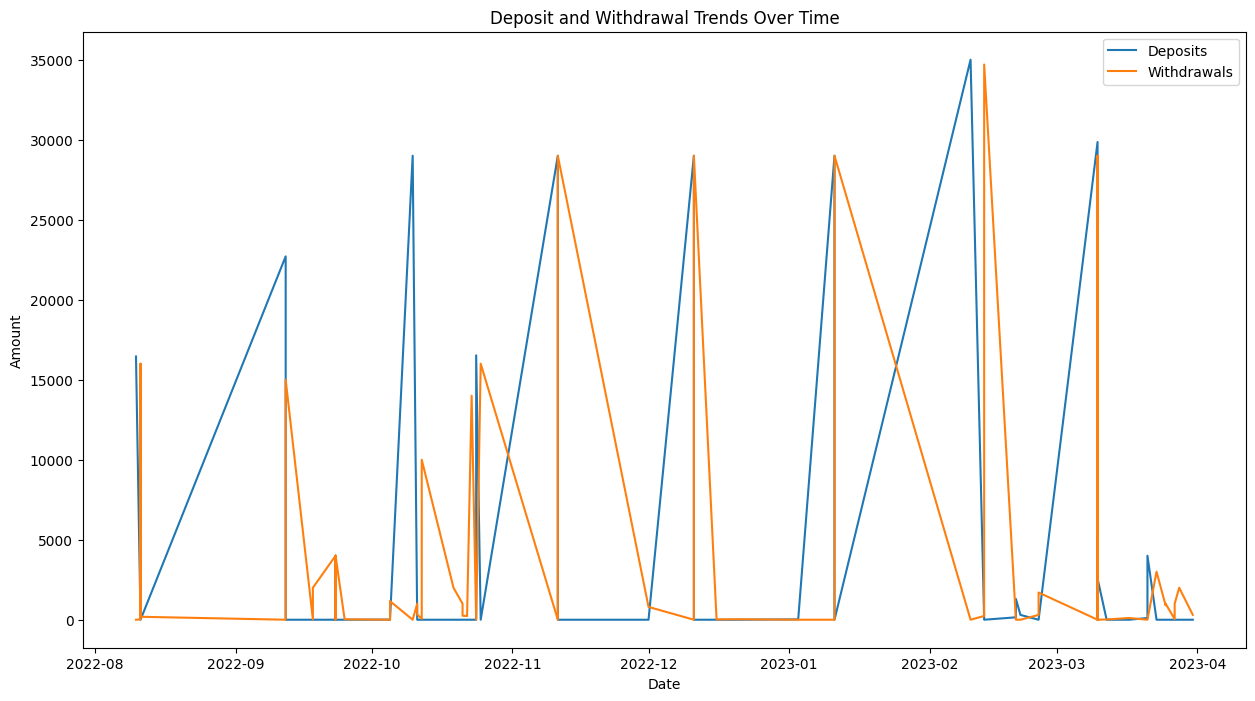

In [40]:
# Deposit and Withdrawal Trends Over Time:
# Visualize the trends of deposits and withdrawals over time.

plt.plot(bank_statement_df['Date'], bank_statement_df['Deposit Amt.'], label='Deposits')
plt.plot(bank_statement_df['Date'], bank_statement_df['Withdrawal Amt.'], label='Withdrawals')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Deposit and Withdrawal Trends Over Time')
plt.legend()
plt.show()


average_expense_per_transaction:  Month
1     -9666.666667
2     -4104.000000
3     -2491.306667
8     -1647.310000
9     -3130.712500
10    -2896.500000
11   -14500.000000
12    -5969.540000
Name: Transaction_Amt, dtype: float64


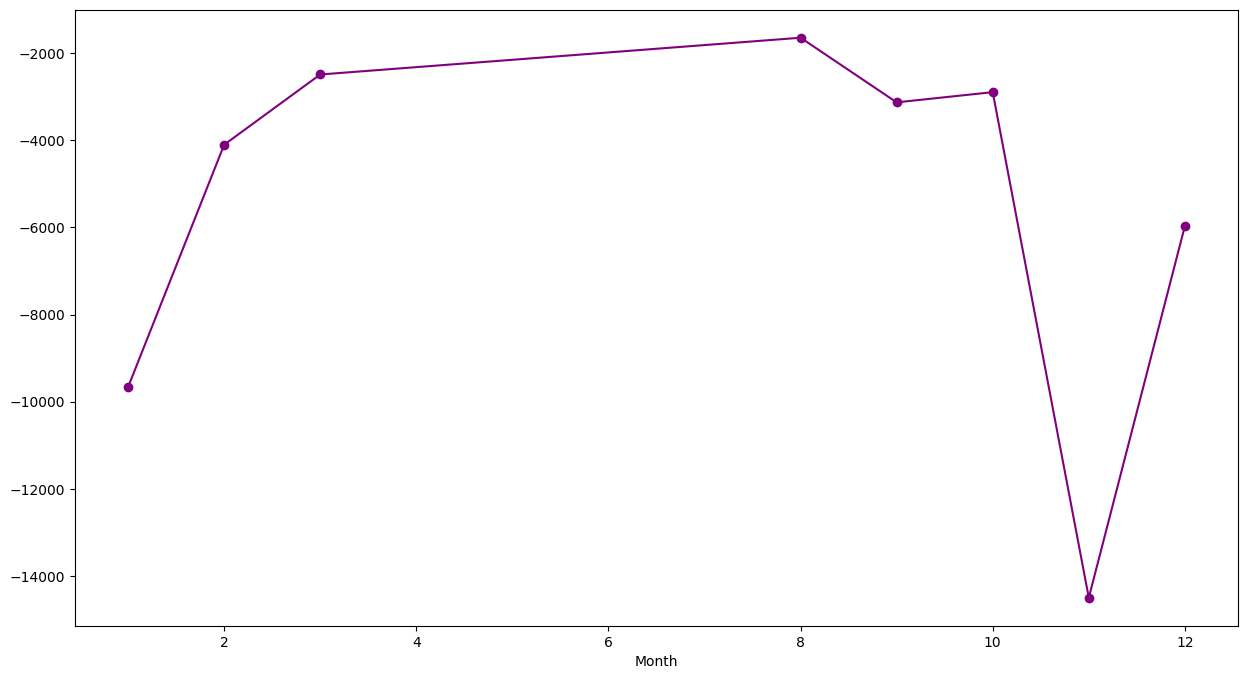

In [41]:
# Average Expense per Transaction:
# Calculate the average expense per transaction for each month.
bank_statement_df['Transaction_Amt'] = bank_statement_df['Withdrawal Amt.'] * -1
average_expense_per_transaction = bank_statement_df.groupby('Month')['Transaction_Amt'].mean()
print("average_expense_per_transaction: ",average_expense_per_transaction)
average_expense_per_transaction.plot(kind = "line", color = "purple",marker='o')
plt.show()

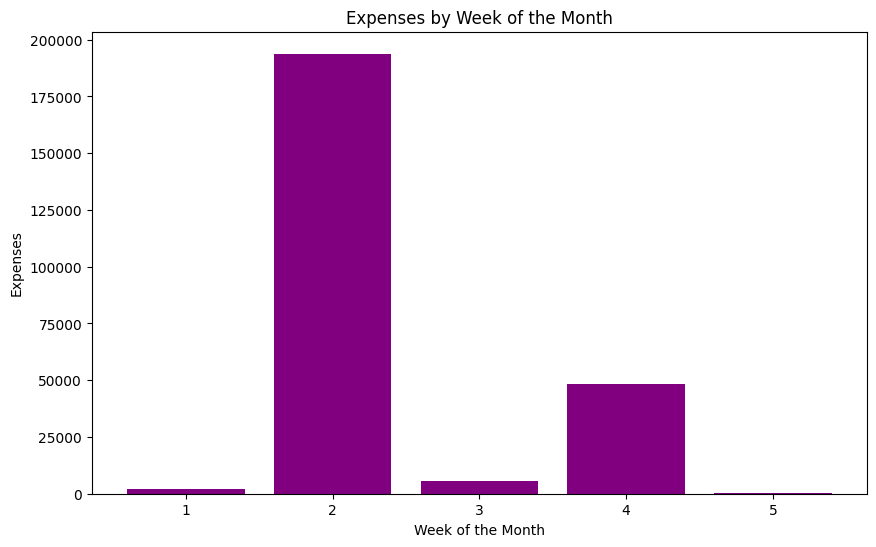

In [42]:
# Expenses by Week of the Month:
# # Analyze your expenses based on the week of the month (e.g., 1st week, 2nd week, etc.).
week_of_month = bank_statement_df['Date'].apply(lambda x: (x.day - 1) // 7 + 1)
expenses_by_week_of_month = bank_statement_df.groupby(week_of_month)['Withdrawal Amt.'].sum()

plt.figure(figsize=(10, 6))
plt.bar(expenses_by_week_of_month.index, expenses_by_week_of_month,color = "purple")
plt.xlabel('Week of the Month')
plt.ylabel('Expenses')
plt.title('Expenses by Week of the Month')
plt.show()


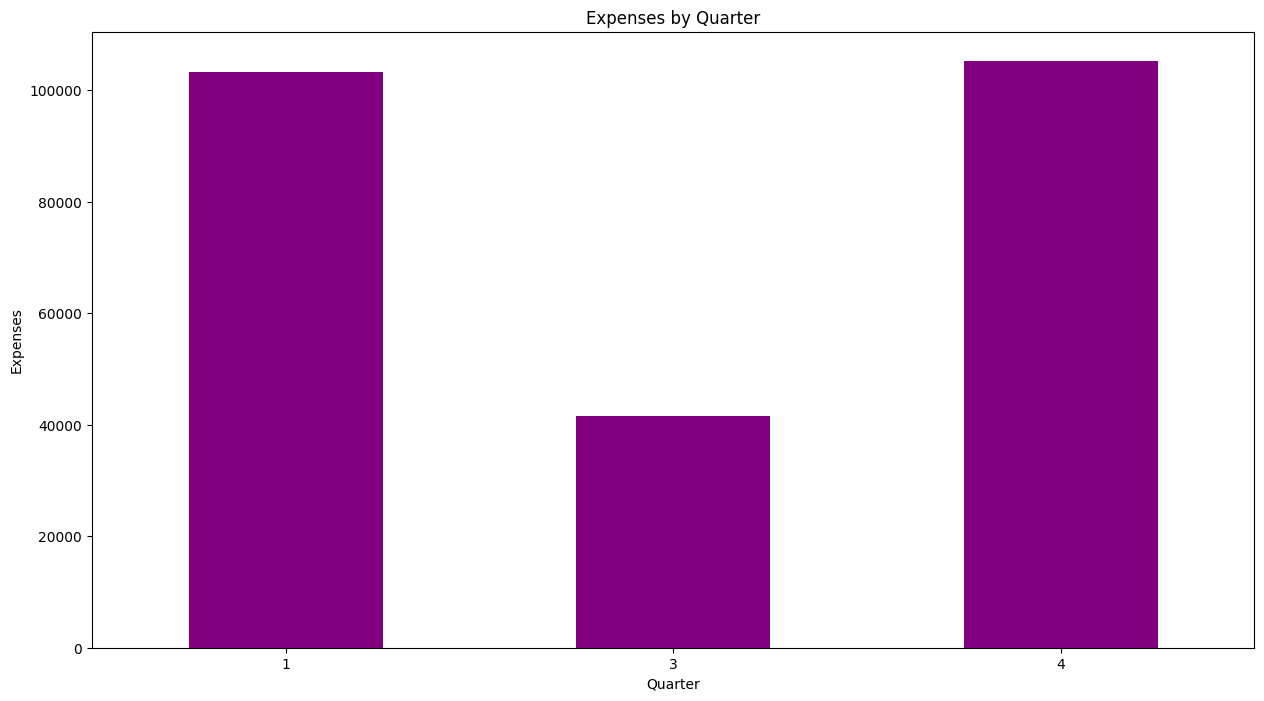

In [43]:
# Expenses by Quarter:
# Analyze your expenses on a quarterly basis.
quarterly_expenses = bank_statement_df.groupby(bank_statement_df['Date'].dt.quarter)['Withdrawal Amt.'].sum()

quarterly_expenses.plot(kind='bar', rot=0,color = "purple")
plt.xlabel('Quarter')
plt.ylabel('Expenses')
plt.title('Expenses by Quarter')
plt.show()


In [44]:
# Financial Ratios:
# Calculate financial ratios to assess your financial health, such as the Debt-to-Income Ratio, Savings Ratio, or Expense-to-Income Ratio.

debt_to_income_ratio :  Month
1      8.614413
2      6.770917
3      6.019277
8     15.196699
9      9.360393
10     5.490877
11     8.621245
12     8.621245
Name: Deposit Amt., dtype: float64
Axes(0.125,0.11;0.775x0.77)


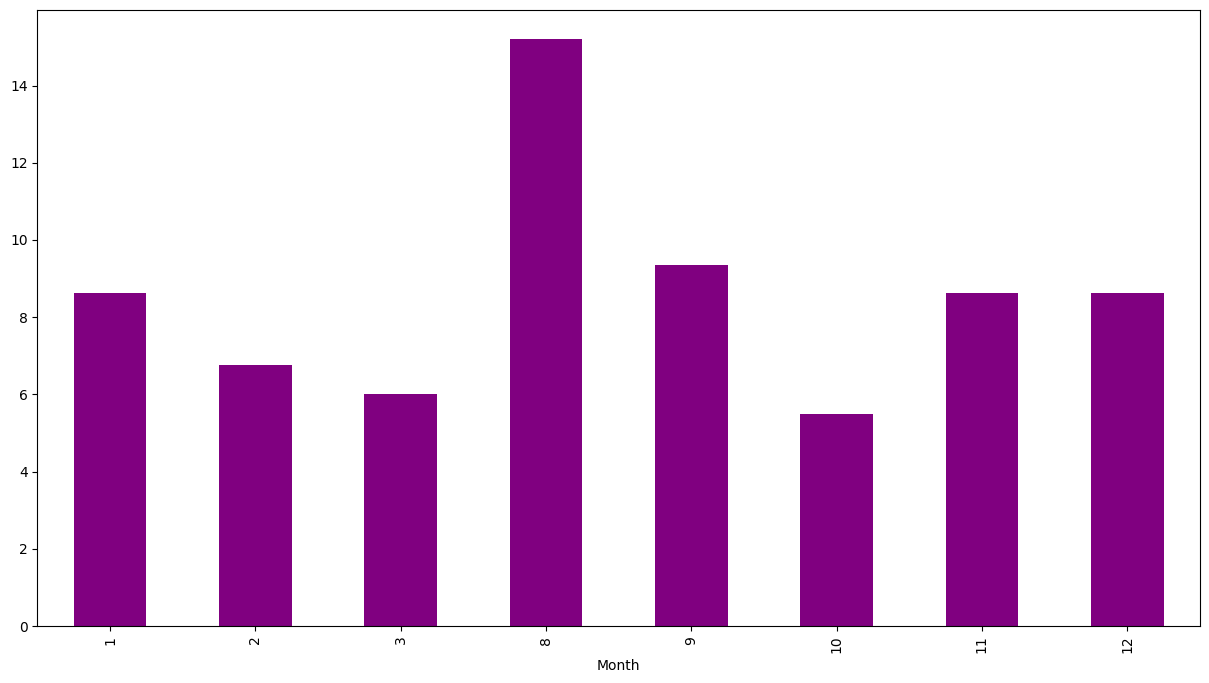

In [45]:
# Debt-to-Income Ratio: Total Monthly Debt Payments / Monthly Gross Income
debt_to_income_ratio = total_expenses / monthly_income
print("debt_to_income_ratio : ",debt_to_income_ratio)
print(debt_to_income_ratio.plot(kind = "bar",color = "purple"))
plt.show()

savings_ratio :  Month
1     0.000792
2    -0.000298
3     0.100306
8    -0.001283
9     0.062310
10   -0.017811
11    0.000000
12   -0.029231
dtype: float64
Axes(0.125,0.11;0.775x0.77)


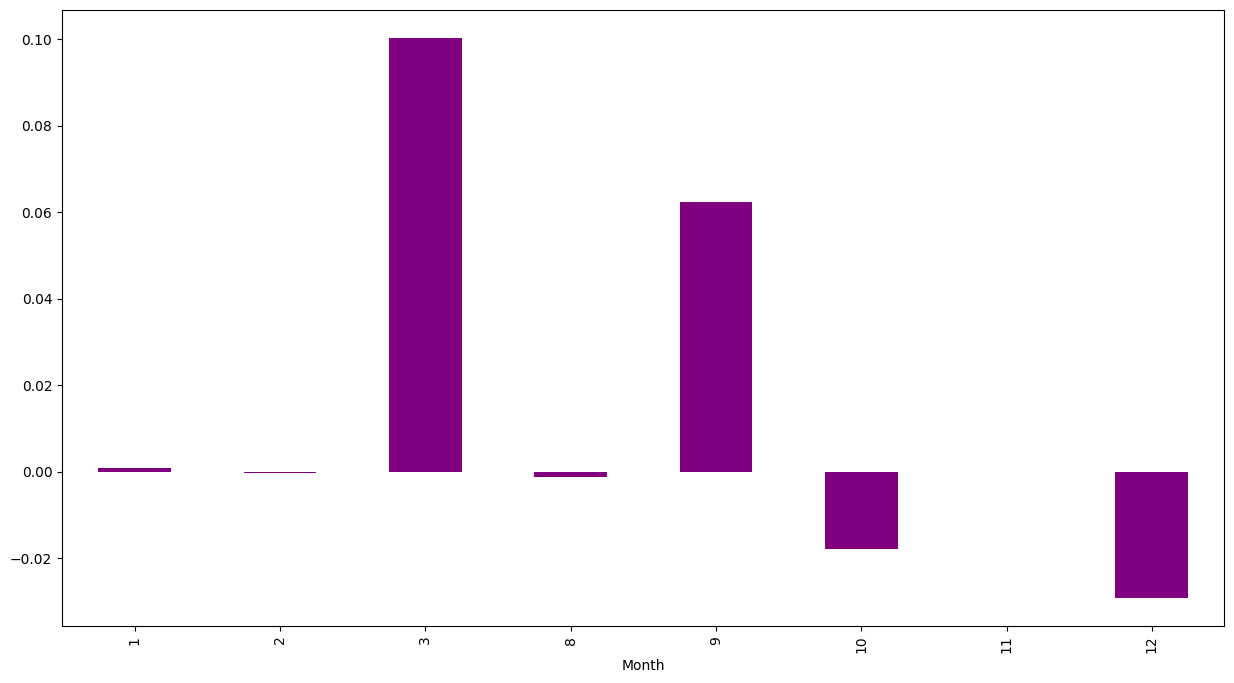

In [46]:
# Savings Ratio: Monthly Savings / Monthly Income
savings_ratio = monthly_savings / monthly_income
print("savings_ratio : ",savings_ratio)
print(savings_ratio.plot(kind = "bar",color = "purple"))
plt.show()

expense_to_income_ratio :  Month
1      8.614413
2      6.770917
3      6.019277
8     15.196699
9      9.360393
10     5.490877
11     8.621245
12     8.621245
Name: Deposit Amt., dtype: float64
Axes(0.125,0.11;0.775x0.77)


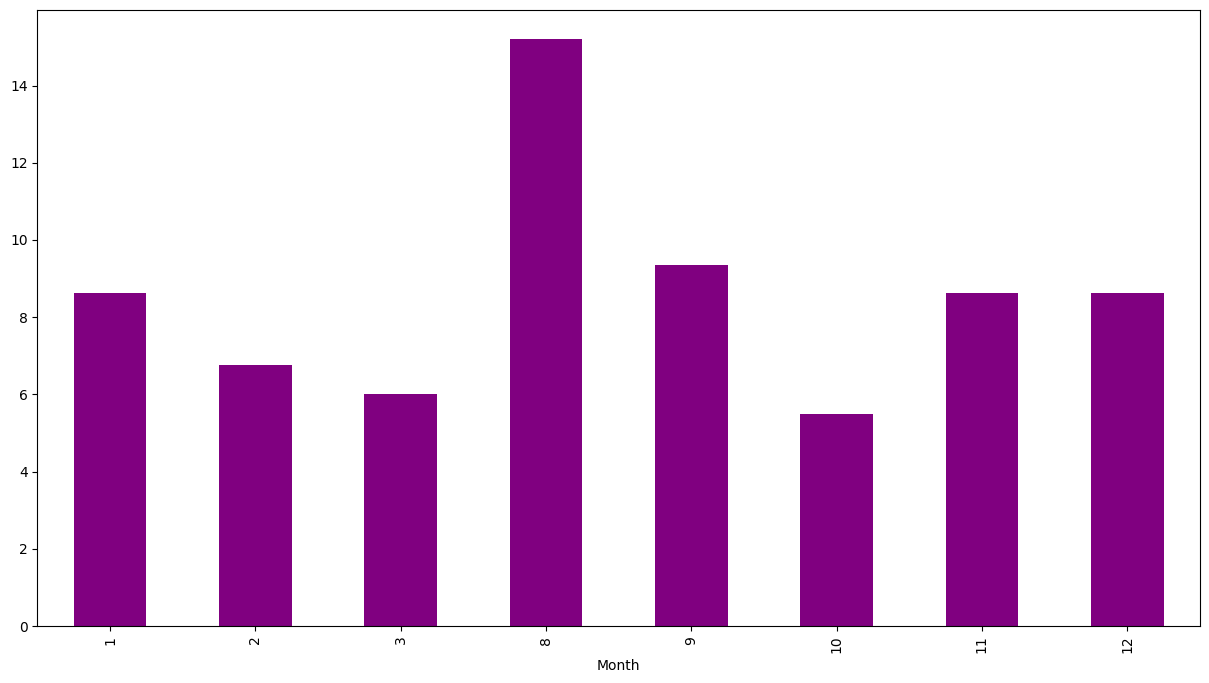

In [47]:
# Expense-to-Income Ratio: Total Monthly Expenses / Monthly Gross Income
expense_to_income_ratio = total_expenses / monthly_income
print("expense_to_income_ratio : ",expense_to_income_ratio)
print(expense_to_income_ratio.plot(kind = "bar",color = "purple"))
plt.show()

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering (e.g., 'Withdrawal Amt.' and 'Deposit Amt.')
features_for_clustering = bank_statement_df[['Withdrawal Amt.', 'Deposit Amt.']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the Elbow method or other techniques
kmeans = KMeans(n_clusters=3)  # You can choose the appropriate number of clusters
bank_statement_df['Cluster'] = kmeans.fit_predict(scaled_features)


In [49]:
bank_statement_df.head()

,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance,Month,Day_of_Week,Net_Cash_Flow,Day,Weekday_Type,Transaction_Amt,Cluster
0,2023-03-31,UPIAR/309020359031/DR/ Paytm 2/NA\n/paytmqr281...,305.0,0.0,4184.56,3,Friday,-305.0,31,Weekday,-305.0,0
1,2023-03-28,UPIAR/308710080093/DR/PRAFUL V/NA\n/7020749887...,2000.0,0.0,4489.56,3,Tuesday,-2000.0,28,Weekday,-2000.0,0
2,2023-03-27,UPIAR/308612661479/DR/PRAFUL V/NA\n/7020749887...,1000.0,0.0,6489.56,3,Monday,-1000.0,27,Weekday,-1000.0,0
3,2023-03-27,UPIAR/308612634727/DR/PRAFUL V/NA\n/7020749887...,40.0,0.0,7489.56,3,Monday,-40.0,27,Weekday,-40.0,0
4,2023-03-25,UPIAR/308417393206/DR/PRAFUL V/NA\n/7020749887...,1000.0,0.0,7529.56,3,Saturday,-1000.0,25,Weekend,-1000.0,0
